In [1]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('C:/COMMUNITY INTERNSHIP/spam-2.csv')
a = df['message']
labels = df["category"].map({'spam':1,'ham':0})
df.head(10)

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


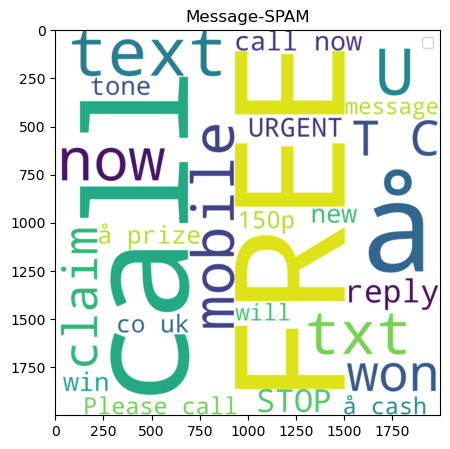

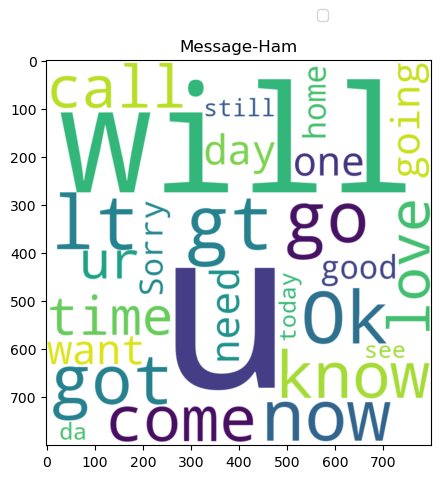

In [4]:
import matplotlib.pyplot as plt
spam = df[df["category"]=='spam']
spam_words = " ".join(comment for comment in spam["message"])
wordcloud = WordCloud(max_words=25,background_color="white", width=2000, height=2000,
                 contour_width=3, contour_color='firebrick').generate(spam_words)
# Display the generated image:
plt.figure(figsize=[5,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-SPAM")
plt.legend('RGB')
plt.show()
# Wordcloud for ham texts

ham = df[df["category"]=='ham']

ham_words = " ".join(comment for comment in ham["message"])
wordcloud = WordCloud(max_words=25,background_color="white", width=800, height=800,
                     contour_width=3, contour_color='firebrick').generate(ham_words)
 # Display the generated image:
plt.figure(figsize=[5,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-Ham")
plt.legend(['blue','green'],bbox_to_anchor=(0.75,1.15),ncol=2)
plt.show()

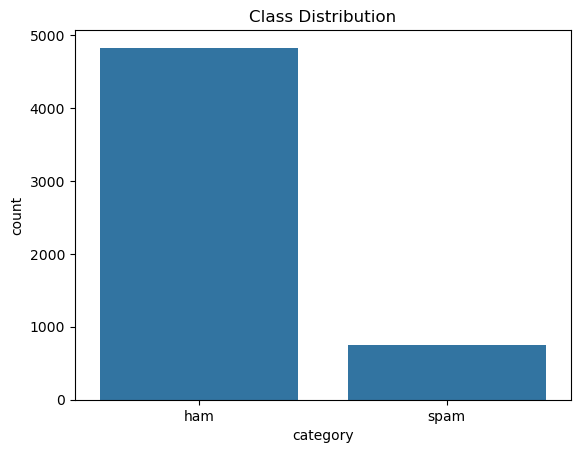

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'category' is a column in your DataFrame 'df'
sns.countplot(x='category', data=df)
plt.title('Class Distribution')
plt.show()


In [6]:
preprocessed_messages = [re.sub(r'\W+', ' ', msg.lower()) for msg in a]


In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_messages)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [9]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
a= accuracy_score(y_test, y_pred)
accuracy=a*100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 97.94


In [12]:
def check_spam_or_not(message):
    preprocessed_msg = re.sub(r'\W+', ' ', message.lower())
    msg_vector = vectorizer.transform([preprocessed_msg])
    prediction = classifier.predict(msg_vector)
    return prediction[0]

In [ ]:
user_message = input("Enter your message: ")
result = check_spam_or_not(user_message)
if result==1:
    print("")
    print('\nThe Message is SPAM')
else:
    print('')
    print("\nThe Message is HAM")